# Recycling Across the UK 

## Introduction

The Household recycling rate is a performance indicator of how much waste households are able to recycle. It is calculated simply by diving the tonnes of waste given to (or collected for) recycling, over the total waste produced. Despite having been given a target by the EU of 50% by the year 2020, the UK has stagnated around 45% for the last five years, and seems unable to progress. In many places, the recycling rate is decreasing, and there is a huge disparity across the UK with regards to how people manage their recycling.

__Business Proposal:__

Given this national perspective, a group of city planners have turned their attention to the city of London, which has some of the lowest recycling rates in the country. 

They want to understand why some neighbourhoods perform better than others, and what correlating variables could affect the score. 

Specifically, they would also like to understand if the presence of recycling centers provide an advantage to the neighborhood in terms of their score. This will enable them to understand whether they should invest in the infrastructure of new centers, or rather in public awareness campaigns to help better the recycling of each community.

__Understanding the data:__

What we need is a good location based API. Foursquare will provide us with the geolocations of all recycling centers in the different neighbourhoods of London. It can also provide us with other related venues, whose presence may be correlated with high recycling rates (supermarkets vs fast food outlets for instance).

This will be combined with the recycling rates given by the city of London to all its' neighborhoods.
https://data.london.gov.uk/dataset/household-waste-recycling-rates-borough

Of course the 33 boroughs of london may provide a small number of data points to reliably extract correlations and to apply machine learing algorithms, so we will also extend our assumptions to the 339 councils across the UK, in the hope that some relevant inferences can be applied to the city. 

To inspect the data, I will superimpose chloropleth maps over the selected geographies, dependent on recycling rate scores, and then will add the variables (eg: recycling centers) from Foursquare. This will enable us to visually indentify if there are some correlations that can be detected. We will also overlay the population cluster density. The data will then be analsed to determine the correlation, and whether we can produce a map that pinpoints where recycling centers can be placed in order to produce the greatest recycling rate score. 


__Starting up the Code:__

Our first task is to import the required libraries that we will use throughout this project. 

In [2]:
#Import Libraries to perform Foursquare API query

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [3]:
#Implement Foursquare credentials

CLIENT_ID = '2EX3X52W403513S2YBE43IEV2S5JS3RXGEXVKVPTRHS1GFBV' # your Foursquare ID
CLIENT_SECRET = 'XRDQAXZDAUEMFOMW5JNR5J2JKAXJPYWT0FFEAVWGA0EGSVY2' # your Foursquare Secret
VERSION = '20191231'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2EX3X52W403513S2YBE43IEV2S5JS3RXGEXVKVPTRHS1GFBV
CLIENT_SECRET:XRDQAXZDAUEMFOMW5JNR5J2JKAXJPYWT0FFEAVWGA0EGSVY2


In [4]:
address = 'London'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


In [5]:
search_query = 'Recycling'
radius = 70000
print(search_query + ' .... OK!')

Recycling .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=2EX3X52W403513S2YBE43IEV2S5JS3RXGEXVKVPTRHS1GFBV&client_secret=XRDQAXZDAUEMFOMW5JNR5J2JKAXJPYWT0FFEAVWGA0EGSVY2&ll=51.5073219,-0.1276474&v=20191231&query=Recycling&radius=70000&limit=30'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f15f799b03989534b10d739'},
 'response': {'venues': [{'id': '5d9c82e8c02e5d00087a88ff',
    'name': 'Londons Computer Recycling',
    'location': {'address': 'Unit B, Pegasus Works 8-10 Roebuck Road, Hainault Business Park',
     'lat': 51.50980284589468,
     'lng': -0.12448668479919432,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.50980284589468,
       'lng': -0.12448668479919432}],
     'distance': 352,
     'postalCode': 'IG6 3UF',
     'cc': 'GB',
     'city': 'Ilford',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['Unit B, Pegasus Works 8-10 Roebuck Road, Hainault Business Park',
      'Ilford',
      'Greater London',
      'IG6 3UF',
      'United Kingdom']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b36',
      'name': 'IT Services',
      'pluralName': 'IT Services',
      'shortName': 'IT Services',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/

In [12]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\Docherty.ATGCH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                        name  \
0  5d9c82e8c02e5d00087a88ff  Londons Computer Recycling   
1  4c26135aa852c9284ee4e56c                   Recycling   
2  4adb5564f964a520042621e3  Reuse and Recycling Centre   
3  4bd435acb221c9b6f226dbd0            Recycling Centre   
4  4b604c5ef964a5204ade29e3  Reuse and Recycling Centre   

                                          categories    referralId  hasPerk  \
0  [{'id': '52f2ab2ebcbc57f1066b8b36', 'name': 'I...  v-1595275209    False   
1  [{'id': '4bf58dd8d48988d115951735', 'name': 'B...  v-1595275209    False   
2                                                 []  v-1595275209    False   
3  [{'id': '4f4531084b9074f6e4fb0101', 'name': 'R...  v-1595275209    False   
4  [{'id': '4f4531084b9074f6e4fb0101', 'name': 'R...  v-1595275209    False   

                                    location.address  location.lat  \
0  Unit B, Pegasus Works 8-10 Roebuck Road, Haina...     51.509803   
1                                  100 Elephant Road     51.494712   
2                                         Homsey St.     51.549786   
3                                         Factory Ln     51.377536   
4                                       Townmead Rd.     51.475169   

   location.lng                            location.labeledLatLngs  \
0     -0.124487  [{'label': 'display', 'lat': 51.50980284589468...   
1     -0.098254  [{'label': 'display', 'lat': 51.49471156511171...   
2     -0.110673  [{'label': 'display', 'lat': 51.54978608661062...   
3     -0.115076  [{'label': 'display', 'lat': 51.37753644977933...   
4     -0.275310  [{'label': 'display', 'lat': 51.47516930275923...   

   location.distance location.postalCode location.cc location.city  \
0                352             IG6 3UF          GB        Ilford   
1               2473                 NaN          GB    Camberwell   
2               4871                 NaN          GB     Islington   
3              14473             CR0 3RL          GB       Croydon   
4              10842             TW9 4EL          GB           Kew   

   location.state location.country  \
0  Greater London   United Kingdom   
1  Greater London   United Kingdom   
2  Greater London   United Kingdom   
3  Greater London   United Kingdom   
4  Greater London   United Kingdom   

                           location.formattedAddress location.crossStreet  \
0  [Unit B, Pegasus Works 8-10 Roebuck Road, Hain...                  NaN   
1  [100 Elephant Road, Camberwell, Greater London...                  NaN   
2  [Homsey St., Islington, Greater London, United...                  NaN   
3  [Factory Ln, Croydon, Greater London, CR0 3RL,...                  NaN   
4  [Townmead Rd. (at Mortlake Rd.), Kew, Greater ...      at Mortlake Rd.   

  venuePage.id location.neighborhood  
0          NaN                   NaN  
1          NaN                   NaN  
2          NaN                   NaN  
3          NaN                   NaN  
4          NaN                   NaN

In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name            categories  \
0                         Londons Computer Recycling           IT Services   
1                                          Recycling             Bike Shop   
2                         Reuse and Recycling Centre                  None   
3                                   Recycling Centre    Recycling Facility   
4                         Reuse and Recycling Centre    Recycling Facility   
5                                   Recycling Centre    Recycling Facility   
6                    Guilford Place Recycling Centre   Government Building   
7                 Waste, Refuse and Recycling Centre    Recycling Facility   
8                                   Recycling Centre              Building   
9                     Old Ford Water Recycling Plant  Other Great Outdoors   
10                                   N J B Recycling        Waste Facility   
11                       Re-use and Recycling Centre    Recycling Facility   
12                        Reuse and Recycling Centre    Recycling Facility   
13                        Sanctuary Street Recycling              Building   
14                        Reuse and Recycling Centre    Recycling Facility   
15             Waldo Road Reuse and Recycling Centre    Recycling Facility   
16      Churchfields Road Reuse and Recycling Centre        Waste Facility   
17                                  Recycling Centre           Flea Market   
18                         Epson Cartridge Recycling    Recycling Facility   
19  Manor Place Household Waste and Recycling Centre    Recycling Facility   
20                       Re-use and Recycling Centre              Building   
21              Mornington Crescent Recycling Centre    Recycling Facility   
22             Wandsworth Household Recycling Centre    Recycling Facility   
23                            Smith street Recycling    Recycling Facility   
24                        Islington Recycling Centre              Building   
25                        Reuse and Recycling Centre                  None   
26                                   Recycling Point    Recycling Facility   
27                                  JR Recycling Ltd                  None   
28           Gerpins Lane Reuse and Recycling Centre    Recycling Facility   
29             Shepperton Community Recycling Centre    Recycling Facility   

                                              address        lat       lng  \
0   Unit B, Pegasus Works 8-10 Roebuck Road, Haina...  51.509803 -0.124487   
1                                   100 Elephant Road  51.494712 -0.098254   
2                                          Homsey St.  51.549786 -0.110673   
3                                          Factory Ln  51.377536 -0.115076   
4                                        Townmead Rd.  51.475169 -0.275310   
5                                                 NaN  51.503410 -0.079262   
6                                      Guilford Place  51.523511 -0.119270   
7                                          Forward Dr  51.589479 -0.326443   
8                                        Landmann Way  51.484668 -0.046510   
9                                                 NaN  51.536988 -0.020069   
10                                         77 Weir Rd  51.438475 -0.189872   
11                                   Kimpton Park Way  51.378968 -0.211923   
12                                           Abbey Rd  51.537874 -0.276332   
13                                                NaN  51.501278 -0.095500   
14                                         Nathan Way  51.496610  0.105774   
15                                           Waldo Rd  51.398994  0.031895   
16                                    Churchfields Rd  51.404272 -0.046563   
17                                      Prestons Road  51.505027 -0.007183   
18                    UNIT 17, I/O CENTRE HEARLE WAY,  51.517105 -0.166628   
19                                        Manor Place  51.488674 -0.0

In [14]:
dataframe_filtered.name

0                           Londons Computer Recycling
1                                            Recycling
2                           Reuse and Recycling Centre
3                                     Recycling Centre
4                           Reuse and Recycling Centre
5                                     Recycling Centre
6                      Guilford Place Recycling Centre
7                   Waste, Refuse and Recycling Centre
8                                     Recycling Centre
9                       Old Ford Water Recycling Plant
10                                     N J B Recycling
11                         Re-use and Recycling Centre
12                          Reuse and Recycling Centre
13                          Sanctuary Street Recycling
14                          Reuse and Recycling Centre
15               Waldo Road Reuse and Recycling Centre
16        Churchfields Road Reuse and Recycling Centre
17                                    Recycling Centre
18        

Now we have successfully imported the Foursquare data on all the recycling points across Greater London, we can start to visualize them on a map:

In [25]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11, tiles = 'Stamen Toner') # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

The next part of our task consists of importing the recycling rates of the different boroughs of the city, and converting it to a choropleth map. We will pass a csv file online through the pandas 'read_csv' function.

In [19]:
#Download data related to recycling

url_rec_csv = 'https://data.london.gov.uk/download/household-waste-recycling-rates-borough/15ddc38a-0a37-4f69-98b5-e69e549b39d3/Household%20recycling.csv'
dfrec = pd.read_csv(url_rec_csv)
dfrec

Code                  Area     Year  Recycling_Rates
0    E09000001        City of London  2003/04                8
1    E09000002  Barking and Dagenham  2003/04                5
2    E09000003                Barnet  2003/04               16
3    E09000004                Bexley  2003/04               21
4    E09000005                 Brent  2003/04               10
..         ...                   ...      ...              ...
683  E12000006                  East  2018/19               49
684  E12000007                London  2018/19               33
685  E12000008            South East  2018/19               47
686  E12000009            South West  2018/19               50
687  E92000001               England  2018/19               44

[688 rows x 4 columns]

This csv gives us data going back to 2003. We will filter it under a new dataframe, to select only the latest year 2018/19.

In [20]:
dfrec_current = dfrec[(dfrec.Year == '2018/19')]
dfrec_current

Code                      Area     Year  Recycling_Rates
645  E09000001            City of London  2018/19               30
646  E09000002      Barking and Dagenham  2018/19               24
647  E09000003                    Barnet  2018/19               35
648  E09000004                    Bexley  2018/19               54
649  E09000005                     Brent  2018/19               37
650  E09000006                   Bromley  2018/19               50
651  E09000007                    Camden  2018/19               31
652  E09000008                   Croydon  2018/19               47
653  E09000009                    Ealing  2018/19               53
654  E09000010                   Enfield  2018/19               33
655  E09000011                 Greenwich  2018/19               33
656  E09000012                   Hackney  2018/19               28
657  E09000013    Hammersmith and Fulham  2018/19               24
658  E09000014                  Haringey  2018/19               29
659  E09000015                    Harrow  2018/19               40
660  E09000016                  Havering  2018/19               37
661  E09000017                Hillingdon  2018/19               37
662  E09000018                  Hounslow  2018/19               31
663  E09000019                 Islington  2018/19               29
664  E09000020    Kensington and Chelsea  2018/19               27
665  E09000021      Kingston upon Thames  2018/19               49
666  E09000022                   Lambeth  2018/19               30
667  E09000023                  Lewisham  2018/19               28
668  E09000024                    Merton  2018/19               39
669  E09000025                    Newham  2018/19               17
670  E09000026                 Redbridge  2018/19               25
671  E09000027      Richmond upon Thames  2018/19               43
672  E09000028                 Southwark  2018/19               35
673  E09000029                    Sutton  2018/19               49
674  E09000030             Tower Hamlets  2018/19               23
675  E09000031            Waltham Forest  2018/19               32
676  E09000032                Wandsworth  2018/19               23
677  E09000033               Westminster  2018/19               22
678  E12000001                North East  2018/19               35
679  E12000002                North West  2018/19               45
680  E12000003  Yorkshire and the Humber  2018/19               43
681  E12000004             East Midlands  2018/19               44
682  E12000005             West Midlands  2018/19               40
683  E12000006                      East  2018/19               49
684  E12000007                    London  2018/19               33
685  E12000008                South East  2018/19               47
686  E12000009                South West  2018/19               50
687  E92000001                   England  2018/19               44

In [21]:
dfrec_current.shape

(43, 4)

__Overlaying the Choropleth Map:__

Having downloaded a Geojson file separating the boroughs of the city of London, I open it through the json funtion, to then be able to use it under the geo_data of the map.

In [16]:
import json

with open("C:/Users/Docherty.ATGCH/Desktop/Coding101/london_boroughs.json") as Lon_Boroughs:
    Boroughs = json.load(Lon_Boroughs)
Boroughs

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'id': 0,
   'properties': {'id': 1,
    'name': 'Kingston upon Thames',
    'code': 'E09000021',
    'area_hectares': 3726.117,
    'inner_statistical': 0},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-0.330679062942453, 51.3290110106029],
       [-0.330594448736231, 51.3290880398783],
       [-0.330506117851447, 51.3291488295065],
       [-0.330409211490547, 51.3292085975707],
       [-0.330292121849854, 51.3292707755954],
       [-0.329913461974029, 51.3294605154308],
       [-0.329633594619527, 51.3296570585532],
       [-0.329428784834638, 51.3298420820104],
       [-0.329320915687227, 51.3299664392533],
       [-0.32921448062474, 51.3300908168544],
       [-0.329116323556239, 51.3302638722775],
       [-0.329112955750983, 51.3303960148678],
       [-0.329171167711952, 51.3307295700064],
       [-0.329191302316349

In [26]:
venues_map.choropleth(
    geo_data=Boroughs,
    data=dfrec_current,
    columns=['Code', 'Recycling_Rates'],
    key_on='feature.properties.code',
    fill_color='Greys', 
    fill_opacity=0.5, 
    line_opacity=0.3,
    line_color='YlOrRd',
    legend_name='Recycling Score'
)
# add a red circle marker to represent the Centre point of London
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Trafalgar Square',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the recycling points as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)
# display map
venues_map

Upon first visual inspection of the data, something interesting comes to attention. A first cluster is observable close to the center of the city. Other points then appear to be spaced out across the boroughs. But this first cluster is interesting insofar that it is also situated directly in the boroughs with the worst recycling rates. Here only 17 to 20% of household waste gets recycled. 

We of course cannot tell our city planners at this point that there exists an inverse correlation between recycling center availability and recycling rates. We will explore the data further to determine if we can provide our clients with any actionable insights.  

In the next step I wanted to understand the gravity of the recycling rate scores found in London. So I also downloaded a table containing the data required to calculate the rates for all councils across the UK. 

In [31]:
with open("C:/Users/Docherty.ATGCH/Desktop/Coding101/Local_RecyclingRates.csv") as UK_RR:
    NationRR = pd.read_csv(UK_RR)
NationRR


Financial Year                Region   ONS Code  JPP order  \
0          2018-19            South East  E07000223        346   
1          2018-19            North West  E07000026         40   
2          2018-19         East Midlands  E07000032        104   
3          2018-19            South East  E07000224        345   
4          2018-19         East Midlands  E07000170        139   
..             ...                   ...        ...        ...   
340        2018-19            South West  E06000054        709   
341        2018-19            South East  E06000040        273   
342        2018-19            South East  E06000041        272   
343        2018-19         West Midlands  E08000031        174   
344        2018-19  Yorkshire and Humber  E06000014         78   

                            Local Authority Authority type  \
0                     Adur District Council     Collection   
1                 Allerdale Borough Council     Collection   
2              Amber Valley Borough Council     Collection   
3                     Arun District Council     Collection   
4                 Ashfield District Council     Collection   
..                                      ...            ...   
340                               Wiltshire        Unitary   
341  Windsor and Maidenhead Borough Council        Unitary   
342                       Wokingham Council        Unitary   
343                       Wolverhampton MBC        Unitary   
344                       York City Council        Unitary   

     Total local authority collected waste (tonnes)  \
0                                             23757   
1                                             47359   
2                                             48128   
3                                             56125   
4                                             47361   
..                                              ...   
340                                          230101   
341                                           66988   
342                                           70247   
343                                          126405   
344                                          109455   

     Household - total waste (tonnes)  \
0                               21153   
1                               41187   
2                               45826   
3                               55593   
4                               45939   
..                                ...   
340                            213220   
341                             65186   
342                             68934   
343                            106305   
344                             88235   

     Household - waste sent for recycling-composting-reuse (tonnes)  \
0                                                 7598                
1                                                13743                
2                                                15087                
3                                                23065                
4                                                16410                
..                                                 ...                
340                                              93533                
341                                              28908                
342                                              27896                
343                                              40505                
344                                              38450                

     Household dry recycling-reuse (tonnes)  ...  \
0                                      5253  ...   
1                                      6647  ...   
2                                     10615  ...   
3                                     14025  ...   
4                                     10358  ...   
..                                      ...  ...   
340                                   54620  ...   
341                                   16762

We then use only the columns that interest us and assign them to a new dataframe. 

In [35]:
filtered_columns_NRR = ['Local Authority', 'RecyclingRate Score']
dataframe_NRR_filtered = NationRR.loc[:, filtered_columns_NRR]
dataframe_NRR_filtered


Local Authority  RecyclingRate Score
0                     Adur District Council            35.919255
1                 Allerdale Borough Council            33.367325
2              Amber Valley Borough Council            32.922358
3                     Arun District Council            41.489036
4                 Ashfield District Council            35.721283
..                                      ...                  ...
340                               Wiltshire            43.866898
341  Windsor and Maidenhead Borough Council            44.346946
342                       Wokingham Council            40.467694
343                       Wolverhampton MBC            38.102629
344                       York City Council            43.576812

[345 rows x 2 columns]

In [46]:
dataframe_NRR_filtered.nsmallest(10,'RecyclingRate Score')

Local Authority  RecyclingRate Score
124                          Newham LB            16.934726
9    Barrow-in-Furness Borough Council            19.353120
338           Westminster City Council            21.717028
257            Birmingham City Council            22.009560
201                      Wandsworth LB            23.195909
333                   Tower Hamlets LB            23.236874
317             Slough Borough Council            23.300715
110             Liverpool City Council            23.636737
7              Barking and Dagenham LB            23.690631
82           Hammersmith and Fulham LB            23.757833

It would seem that 5 out of the 10 councils with the lowest recycling rates are all situated in London. It is clear that the city and the areas surrounding it have a recycling problem. 

In [52]:
dataframe_NRR_filtered.describe()

RecyclingRate Score
count           345.000000
mean             42.539669
std               9.753793
min              16.934726
25%              35.721283
50%              42.744187
75%              49.478102
max              64.811697

In fact London, with a cumulative recycling rate of 33%, ranks itself below the 25 percentile of councils. Nonetheless, with an interesting disparity in results between boroughs, we can try to use the foursquare API to understand what separates each neighbourhood. 

Across our readings, one key insight that was found was that a driving factor behind poor recycling rate scores is the housing density. Perhaps the logic here is that people living in closer proximity use mass communal bins, which deliver less a sense of individual responsability than individual containers posted outside every house. Let's download a dataset and explore the correlation. 

In [84]:
with open("C:/Users/Docherty.ATGCH/Desktop/Coding101/Number_and_density_of_dwellings_by_borough.csv") as HD:
    HousingDensity = pd.read_csv(HD)
HousingDensity.head()

ONS code             Area name       2019
0  E09000001        City of London  20.658015
1  E09000002  Barking and Dagenham  20.060938
2  E09000003                Barnet  17.630965
3  E09000004                Bexley  15.305227
4  E09000005                 Brent  27.860433

Our next step is to merge the two tables (Recyling score, and housing density), so we may more easily apply some predictive models onto it. We may replicate the exercise at a national level, since this would equip us with more data sets. Let us arrange this table first, and remove the rows that represent higher level areas. 

In [83]:
HousingDensity.rename(columns={'code': 'Code'}, inplace=True)
#HousingDensity.drop([33,34,35,36], inplace=True)

HousingDensity.head()

Code             Area name       2019
0  E09000001        City of London  20.658015
1  E09000002  Barking and Dagenham  20.060938
2  E09000003                Barnet  17.630965
3  E09000004                Bexley  15.305227
4  E09000005                 Brent  27.860433

In [82]:
df_merge_HD_RR = pd.merge(dfrec_current,HousingDensity,on='Code', how='inner')
df_merge_HD_RR.head()

Code                  Area     Year  Recycling_Rates  \
0  E09000001        City of London  2018/19               30   
1  E09000002  Barking and Dagenham  2018/19               24   
2  E09000003                Barnet  2018/19               35   
3  E09000004                Bexley  2018/19               54   
4  E09000005                 Brent  2018/19               37   

              Area name       2019  
0        City of London  20.658015  
1  Barking and Dagenham  20.060938  
2                Barnet  17.630965  
3                Bexley  15.305227  
4                 Brent  27.860433

In [79]:
filtered_columns_HDRR = ['Code', 'Area', 'Recycling_Rates', '2019']
dataframe_filtered_HDRR = df_merge_HD_RR.loc[:, filtered_columns_HDRR]
dataframe_filtered_HDRR.head()

Code                  Area  Recycling_Rates       2019
0  E09000001        City of London               30  20.658015
1  E09000002  Barking and Dagenham               24  20.060938
2  E09000003                Barnet               35  17.630965
3  E09000004                Bexley               54  15.305227
4  E09000005                 Brent               37  27.860433

In [80]:
dataframe_filtered_HDRR.rename(columns={'2019': 'HousingDensity'}, inplace=True)
dataframe_filtered_HDRR.head()

Code                  Area  Recycling_Rates  HousingDensity
0  E09000001        City of London               30       20.658015
1  E09000002  Barking and Dagenham               24       20.060938
2  E09000003                Barnet               35       17.630965
3  E09000004                Bexley               54       15.305227
4  E09000005                 Brent               37       27.860433

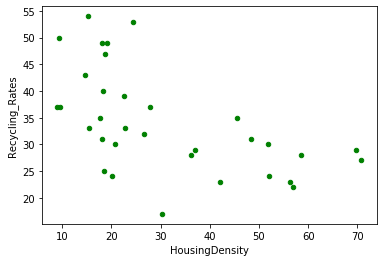

In [81]:


graph1 = dataframe_filtered_HDRR.plot.scatter(x='HousingDensity',y='Recycling_Rates',c='green')
graph1

It seems clear that the boroughs with higher housing density have on average lower recycing rates. But the areas with low recycling rates have a huge divergence between recycling rates (from 24% to 55%). Housing density appears to be an aggrevating factor, contributing to lower results, but conversely lower housing density does not contribute necessarily to higher recycling rates. 

Let us see if we can draw upon the larger national dataset to gain further correlations impacting the recycling rate. 

In [110]:
with open("C:/Users/Docherty.ATGCH/Desktop/Coding101/LocalAuthorityIndices.csv") as LCI:
    LocalAuthority_Incidences = pd.read_csv(LCI)
LocalAuthority_Incidences

Code Local Authority  RecyclingRate  Housing Density  Jobs Density  \
0    E07000223            Adur      35.919255         4.230926          67.0   
1    E07000026       Allerdale      33.367325         0.283881          80.0   
2    E07000032    Amber Valley      32.922358         1.396583          72.0   
3    E07000224            Arun      41.489036         2.492890          69.0   
4    E07000170        Ashfield      35.721283         3.243142          75.0   
..         ...             ...            ...              ...           ...   
321  E07000238        Wychavon      43.825032         0.665433          84.0   
322  E07000007         Wycombe      51.358660         1.617086          94.0   
323  E07000128            Wyre      43.172020         1.213120          64.0   
324  E07000239     Wyre Forest      32.558270         1.632870          72.0   
325  E06000014            York      43.576812         2.140104          91.0   

     pct Managers and Senior Directors  pct Professional occupations  \
0                                 10.9                          31.8   
1                                  9.6                          19.3   
2                                 10.8                          19.7   
3                                 10.2                          21.2   
4                                  9.0                          11.5   
..                                 ...                           ...   
321                               16.9                          14.7   
322                                NaN                           NaN   
323                               11.2                          18.7   
324                                7.5                          17.1   
325                               13.5                          23.3   

     pct associate prof and tech occupations  pct Admin & Secretarial  \
0                                       20.8                      NaN   
1                                       10.2                      3.0   
2                                       14.7                     11.5   
3                                       14.1                      9.0   
4                                       16.2                      9.0   
..                                       ...                      ...   
321                                     13.5                     11.3   
322                                      NaN                      NaN   
323                                     11.6                      9.6   
324                                     12.2                     15.9   
325                                     13.3                      8.4   

     pct skilled trades  pct Caring   leisure and other  \
0                   7.5         7.9                10.5   
1                  20.7         7.6                 5.7   
2                  12.3         4.4                 8.2   
3                  11.4         8.5                 6.5   
4                  15.7         9.9                 8.9   
..                  ...         ...                 ...   
321                13.4        10.5                 5.4   
322                 NaN         NaN                 NaN   
323                13.8        10.1                11.6   
324                19.4         4.9                 5.2   
325                 7.1         8.0                 6.8   

     pct Sales and customer service  pct machine operatives  
0                               NaN                     NaN  
1                               9.2                    14.1  
2                               7.8                    10.6  
3                              14.2                     4.8  
4                              10.9                     8.7  
..                              ...                     ...  
321                             5.2                     9.0  
322                             NaN                     NaN  
323                             4.7     

In [113]:
correlation = LocalAuthority_Incidences.corr()
print(correlation)

                                         RecyclingRate  Housing Density  \
RecyclingRate                                 1.000000        -0.434069   
Housing Density                              -0.434069         1.000000   
Jobs Density                                 -0.072588         0.044636   
pct Managers and Senior Directors             0.241627        -0.057655   
pct Professional occupations                  0.097126         0.293669   
pct associate prof and tech occupations       0.072793         0.296539   
pct Admin & Secretarial                       0.017007        -0.128240   
pct skilled trades                           -0.018006        -0.369347   
pct Caring                                   -0.037616        -0.166586   
 leisure and other                           -0.203056        -0.130436   
pct Sales and customer service               -0.147050        -0.207542   
pct machine operatives                       -0.213001        -0.047501   

                        

Against our hopes, it seems that we have run short of variables which could supply a better correlation of Housing Density. It remains the variable with the highest score. We will therefore proceed to build our model. 

In [115]:
filtered_columns_HDRR_UK = ['Code', 'Local Authority', 'RecyclingRate', 'Housing Density']
dataframe_filtered_HDRR_UK = LocalAuthority_Incidences.loc[:, filtered_columns_HDRR_UK]
dataframe_filtered_HDRR_UK.head()

Code Local Authority  RecyclingRate  Housing Density
0  E07000223            Adur      35.919255         4.230926
1  E07000026       Allerdale      33.367325         0.283881
2  E07000032    Amber Valley      32.922358         1.396583
3  E07000224            Arun      41.489036         2.492890
4  E07000170        Ashfield      35.721283         3.243142

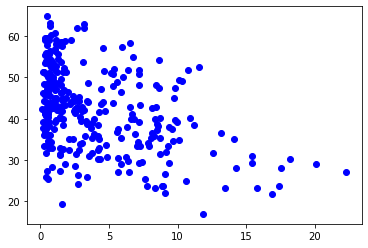

In [122]:
import matplotlib.pyplot as plt

plt.scatter(dataframe_filtered_HDRR_UK['Housing Density'],dataframe_filtered_HDRR_UK.RecyclingRate,c='blue')
plt.xlabel ="Housing Density"
plt.ylabel ="Recycling Rate"
plt.show()

The effect seen in London seems to be replicated across the country. Areas with high housing densities appear overall unable to recycle more than 30% of their waste. After this visualisation, it seems possible that we can group areas into three sections:

1. Areas with Housing densities ranging from 0-5
1. Areas with Housing densities ranging from 5-10
1. Areas with Housing densities ranging from 10-25

We would advise our city planners on adapting their strategy to each of these three groups. Perhaps a further deep dive and be applied to this split. 

# Discussion

We started off exploring an assumption that recycling centers could affect recycling rate scores. This revealed not to be the case. Further readings suggested that housing density was a good variable, and upon further examination, it seems that indeed Housing Density is an aggravating factor, and quite a severe one to the point that not one council with a density over 10 is able to achieve an adequate recycling score. 

# Conclusion

Clearly there is another variable at play that needs to be uncovered. We hope to pursue the project further to understand the reasons why some councils outperform their recycling targets.  